# TEAM 7: HEART DISEASE RISK FACTOR ANLAYSIS


CIS: 500 DATA ANALYSIS AND DECSIONS TESTING

Team Members:
    
    1. Mohit Thaker (SUID: 450607855)
    
    2. Sohan Thakur (SUID: 578607587)
    
    3. Kavya Shah (SUID: 330126500)

In [2]:
# Import modules
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Step 1: Loading Dataset

In [3]:
# Read Dataset and Print it
df = pd.read_csv('heart.csv')
print(f"Dataset: \n\n{df.head()}")
print(f"\n\nShape of the dataset: {df.shape}")
print(f"\n\nTotal Null Values in dataset{df.isnull().sum()}")

Dataset: 

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Shape of the dataset: (918, 12)


Total Null Values in datasetAge               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG  

In [4]:
# Replacing the zero - value of Cholestrol coulmn with the average
print("Total zero-values: ",(df['Cholesterol'] == 0).sum())

cholesterol = df['Cholesterol']

# Calculate the average of non-zero values
non_zero_cholesterol = cholesterol[cholesterol != 0]
average_cholesterol = non_zero_cholesterol.mean()

df['Cholesterol'] = df['Cholesterol'].replace(0, average_cholesterol)


Total zero-values:  172


# Step 2: Descriptive Analysis and Data Preprocessing

In [5]:
# Printing Uniques Values of categorical data columns And counting for each of them
print("Categorical Data Columns & Frequency Distribution: \n")

# 1. Sex Column:
print("Sex: ")
print("  - Male (M):", (df['Sex'] == 'M').sum())
print("  - Female (F):", (df['Sex'] == 'F').sum())
print()

# 2. Chest Paint Type Column:
print("Chest Pain Type: ")
print("  - Typical Angina (TA):", (df['ChestPainType'] == 'TA').sum())
print("  - Atypical Angina (ATA):", (df['ChestPainType'] == 'ATA').sum())
print("  - Non-Anginal Pain (NAP):", (df['ChestPainType'] == 'NAP').sum())
print("  - Asymptomatic (ASY):", (df['ChestPainType'] == 'ASY').sum())
print()

# 3. Resting ECG Type Column:
print("Resting ECG: ")
print("  - Normal:", (df['RestingECG'] == 'Normal').sum())
print("  - Abnormal (ST-T wave abnormality):", (df['RestingECG'] == 'ST').sum())
print("  - Left Ventricular Hypertrophy (LVH):", (df['RestingECG'] == 'LVH').sum())
print()

# 4. Exercise Angina Column:
print("Exercise-Induced Angina: ")
print("  - No:", (df['ExerciseAngina'] == 'N').sum())
print("  - Yes:", (df['ExerciseAngina'] == 'Y').sum())
print()

# 5. ST Slope Column:
print("ST Segment Slope: ")
print("  - Upsloping:", (df['ST_Slope'] == 'Up').sum())
print("  - Flat:", (df['ST_Slope'] == 'Flat').sum())
print("  - Downsloping:", (df['ST_Slope'] == 'Down').sum())


Categorical Data Columns & Frequency Distribution: 

Sex: 
  - Male (M): 725
  - Female (F): 193

Chest Pain Type: 
  - Typical Angina (TA): 46
  - Atypical Angina (ATA): 173
  - Non-Anginal Pain (NAP): 203
  - Asymptomatic (ASY): 496

Resting ECG: 
  - Normal: 552
  - Abnormal (ST-T wave abnormality): 178
  - Left Ventricular Hypertrophy (LVH): 188

Exercise-Induced Angina: 
  - No: 547
  - Yes: 371

ST Segment Slope: 
  - Upsloping: 395
  - Flat: 460
  - Downsloping: 63


In [6]:
# Performing Label Encoding to convert the categorical data columns:

# Perform label encoding for Sex column
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Map chest pain types to numerical values based on severity
# TA (Typical Angina): Common heart-related chest pain.
# ATA (Atypical Angina): Chest discomfort that's not typical angina.
# NAP (Non-Anginal Pain): Pain not related to the heart.ASY (Asymptomatic): Absence of chest pain, but hints at potential heart issues.

chest_pain_map = {'TA': 3, 'ATA': 0, 'NAP': 1, 'ASY': 2}
df['ChestPainType'] = df['ChestPainType'].map(chest_pain_map)

# Map resting electrocardiogram results to numerical values based on severity
resting_ecg_map = {'Normal': 0, 'ST': 1, 'LVH': 2}
df['RestingECG'] = df['RestingECG'].map(resting_ecg_map)

# Map ExerciseAngina to numerical values
exercise_angina_map = {'Y': 1, 'N': 0}
df['ExerciseAngina'] = df['ExerciseAngina'].map(exercise_angina_map)

# Map ST_Slope to numerical values based on severity
st_slope_map = {'Up': 0, 'Flat': 1, 'Down': 2}
df['ST_Slope'] = df['ST_Slope'].map(st_slope_map)


In [7]:
# Print df
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,0,140,289.0,0,0,172,0,0.0,0,0,True
1,49,1,160,180.0,0,0,156,0,1.0,1,1,False
2,37,0,130,283.0,0,1,98,0,0.0,0,0,True
3,48,2,138,214.0,0,0,108,1,1.5,1,1,False
4,54,1,150,195.0,0,0,122,0,0.0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,3,110,264.0,0,0,132,0,1.2,1,1,True
914,68,2,144,193.0,1,0,141,0,3.4,1,1,True
915,57,2,130,131.0,0,0,115,1,1.2,1,1,True
916,57,0,130,236.0,0,2,174,0,0.0,1,1,False


In [8]:
df.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.452070,132.396514,244.635389,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.851832,18.514154,53.318029,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,2.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


# Step 3: Data Visualization:

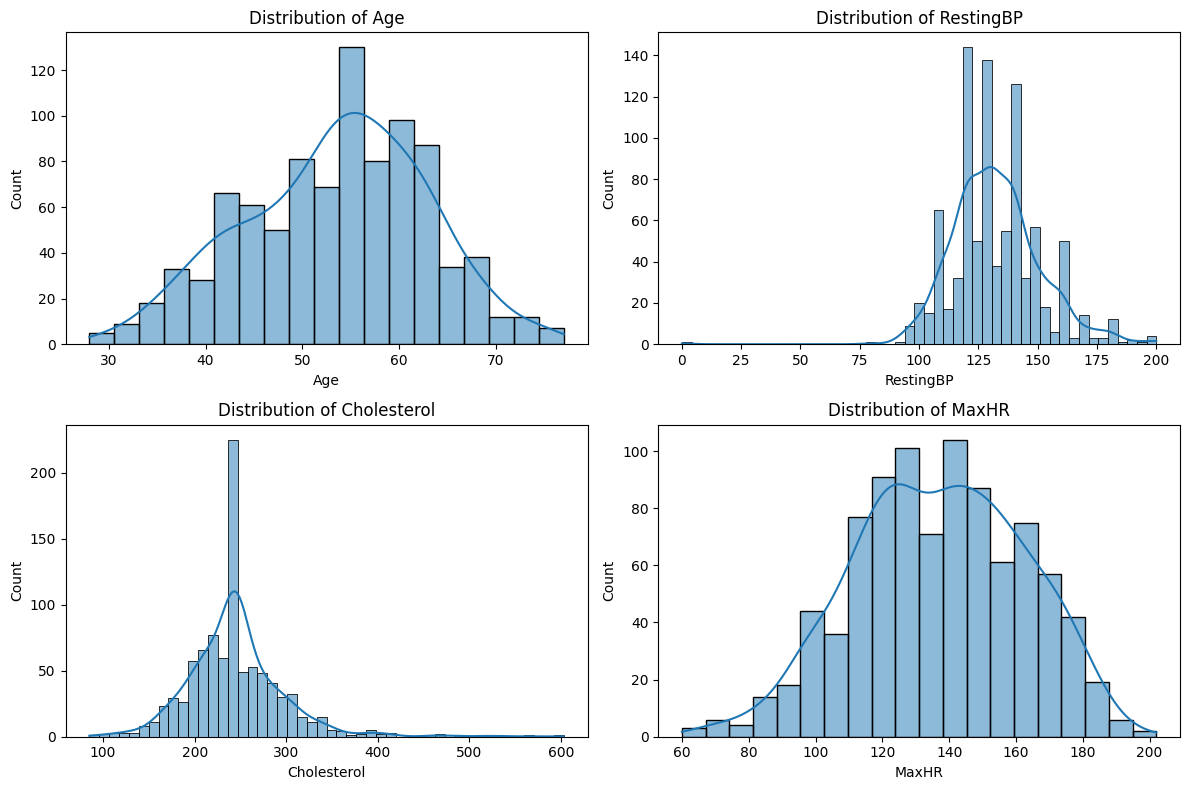

In [9]:
# Data Visualization

# Histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'RestingBP', 'Cholesterol', 'MaxHR']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


<ipython-input-10-796def69d09d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-10-796def69d09d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-10-796def69d09d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-10-796def69d09d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

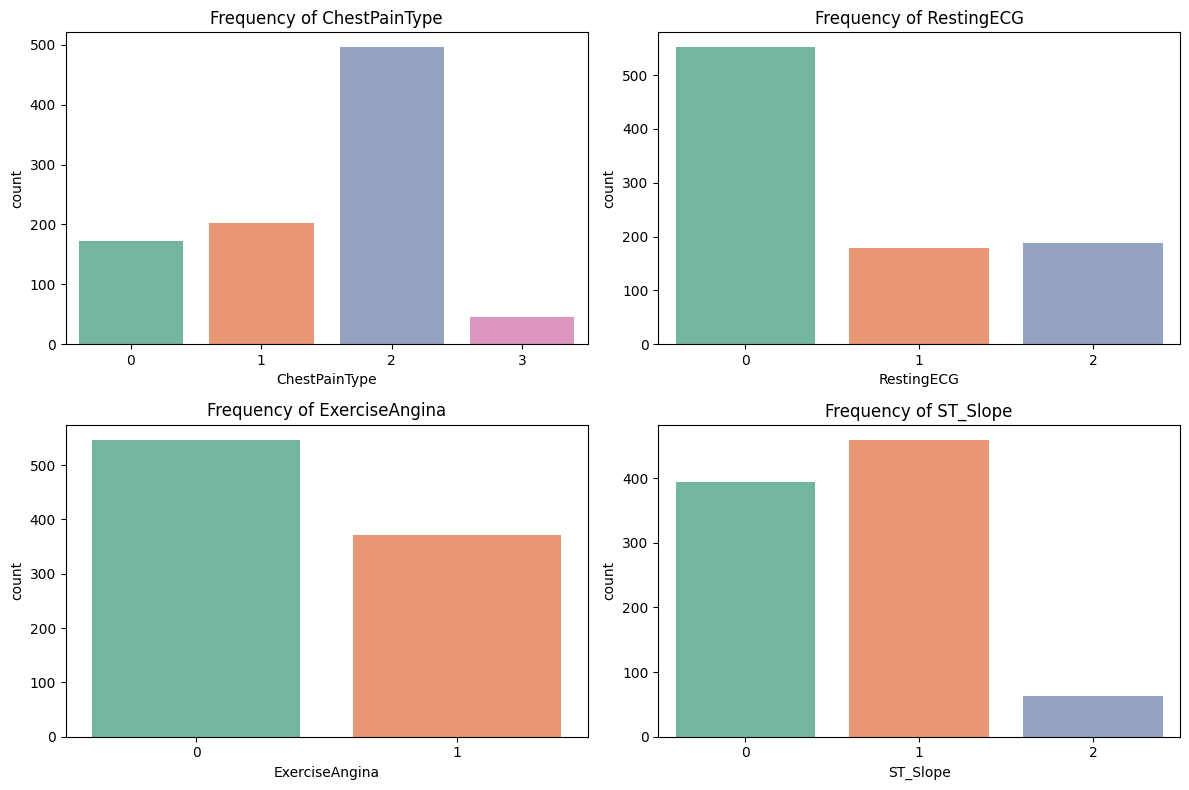

In [10]:
# Bar plots for categorical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Frequency of {col}')
plt.tight_layout()
plt.show()


# Categorical Data Columns & Frequency Distribution:

# Sex:
#   - Male (M): 725
#   - Female (F): 193

# Chest Pain Type:
#   - Typical Angina (TA): 46
#   - Atypical Angina (ATA): 173
#   - Non-Anginal Pain (NAP): 203
#   - Asymptomatic (ASY): 496

# Resting ECG:
#   - Normal: 552
#   - Abnormal (ST-T wave abnormality): 178
#   - Left Ventricular Hypertrophy (LVH): 188

# Exercise-Induced Angina:
#   - No: 547
#   - Yes: 371

# ST Segment Slope:
#   - Upsloping: 395
#   - Flat: 460
#   - Downsloping: 63


<ipython-input-11-f4c7a533afd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y=col, palette='Set2')
<ipython-input-11-f4c7a533afd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y=col, palette='Set2')
<ipython-input-11-f4c7a533afd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HeartDisease', y=col, palette='Set2')
<ipython-input-11-f4c7a533afd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

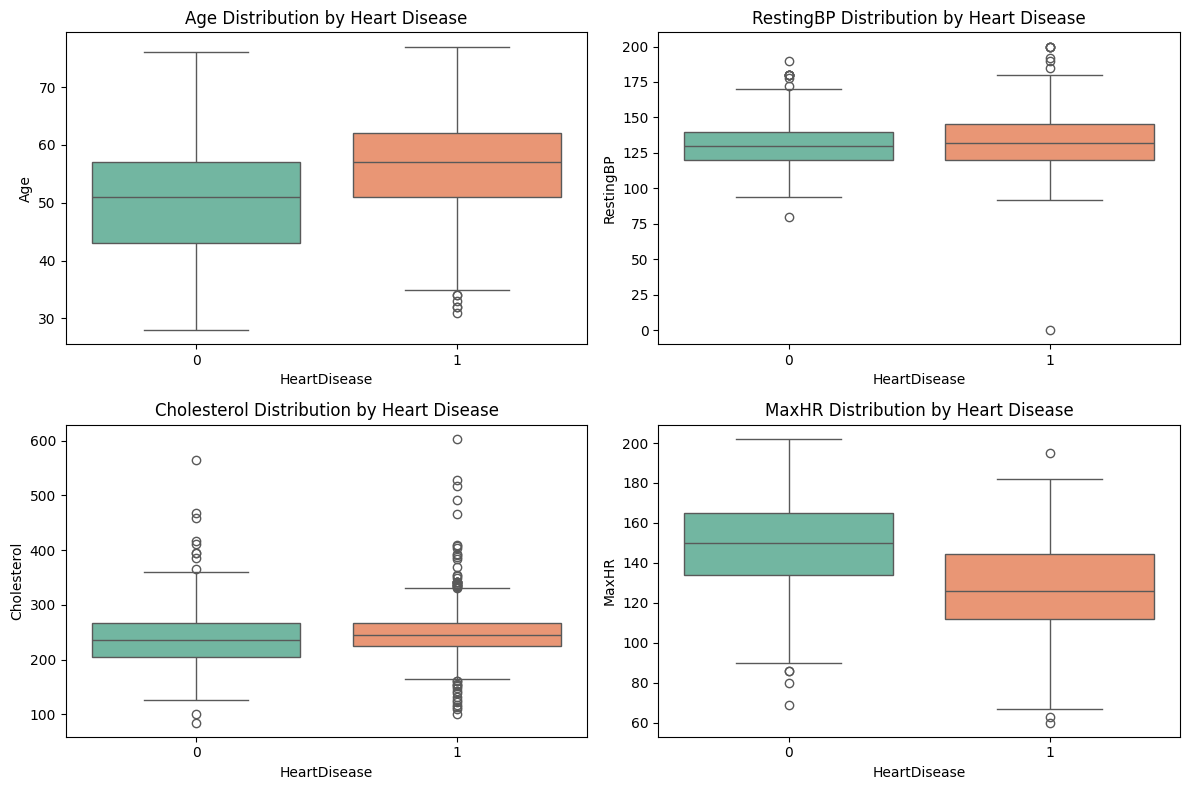

<ipython-input-11-f4c7a533afd5>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([chest_pain_labels[label] for label in sorted(df[col].unique())], rotation=45)  # Set x-axis tick labels for ChestPainType
<ipython-input-11-f4c7a533afd5>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability
<ipython-input-11-f4c7a533afd5>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability
<ipython-input-11-f4c7a533afd5>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability


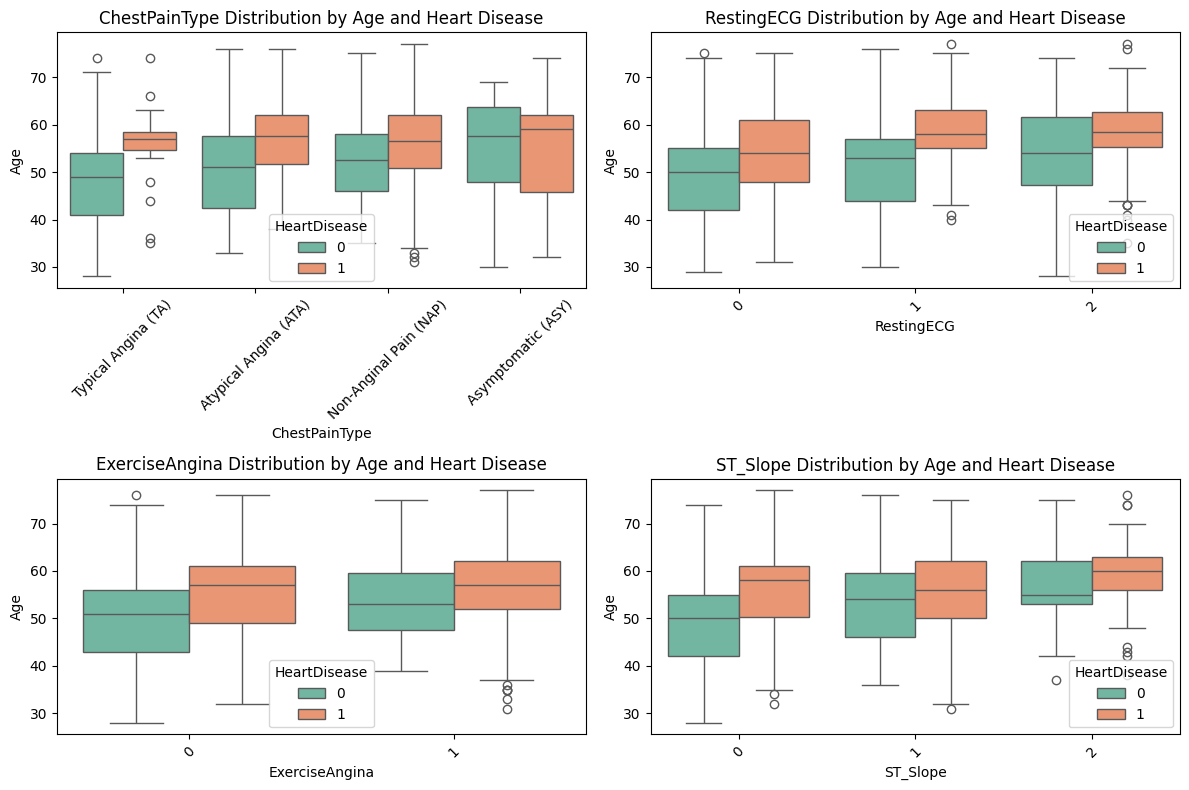

In [11]:
# # Box plots to identify outliers or differences in numerical variables between individuals with and without heart disease
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'RestingBP', 'Cholesterol', 'MaxHR']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x='HeartDisease', y=col, palette='Set2')
    plt.title(f'{col} Distribution by Heart Disease')
plt.tight_layout()
plt.show()


# Mapping numerical values to categorical labels for ChestPainType
chest_pain_labels = {
    0: 'Typical Angina (TA)',
    1: 'Atypical Angina (ATA)',
    2: 'Non-Anginal Pain (NAP)',
    3: 'Asymptomatic (ASY)'
}

plt.figure(figsize=(12, 8))

# Box plots for categorical variables
categorical_variables = ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for i, col in enumerate(categorical_variables):
    plt.subplot(2, 2, i+1)
    ax = sns.boxplot(data=df, x=col, y='Age', hue='HeartDisease', palette='Set2')
    plt.title(f'{col} Distribution by Age and Heart Disease')
    if col == 'ChestPainType':
        ax.set_xticklabels([chest_pain_labels[label] for label in sorted(df[col].unique())], rotation=45)  # Set x-axis tick labels for ChestPainType
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


# Step 4: Correlation Analysis :

In [12]:
# Compute Corelation Matrix:
corr_matrix = df.corr(method = 'pearson')
print("\n-------Correlation Matrix------\n\n")
print(corr_matrix)



-------Correlation Matrix------


                     Age  ChestPainType  RestingBP  Cholesterol  FastingBS  \
Age             1.000000       0.214164   0.254399     0.053373   0.198039   
ChestPainType   0.214164       1.000000   0.075332     0.032253   0.155111   
RestingBP       0.254399       0.075332   1.000000     0.080723   0.070193   
Cholesterol     0.053373       0.032253   0.080723     1.000000   0.043008   
FastingBS       0.198039       0.155111   0.070193     0.043008   1.000000   
RestingECG      0.213152       0.112067   0.097661     0.063593   0.050707   
MaxHR          -0.382045      -0.273076  -0.112135    -0.017239  -0.131438   
ExerciseAngina  0.215793       0.324049   0.155101     0.077549   0.060451   
Oldpeak         0.258612       0.300846   0.164803     0.053029   0.052698   
ST_Slope        0.268264       0.352364   0.075162     0.069723   0.175774   
HeartDisease    0.282039       0.459017   0.107589     0.094071   0.267291   
Sex_M           0.055750     

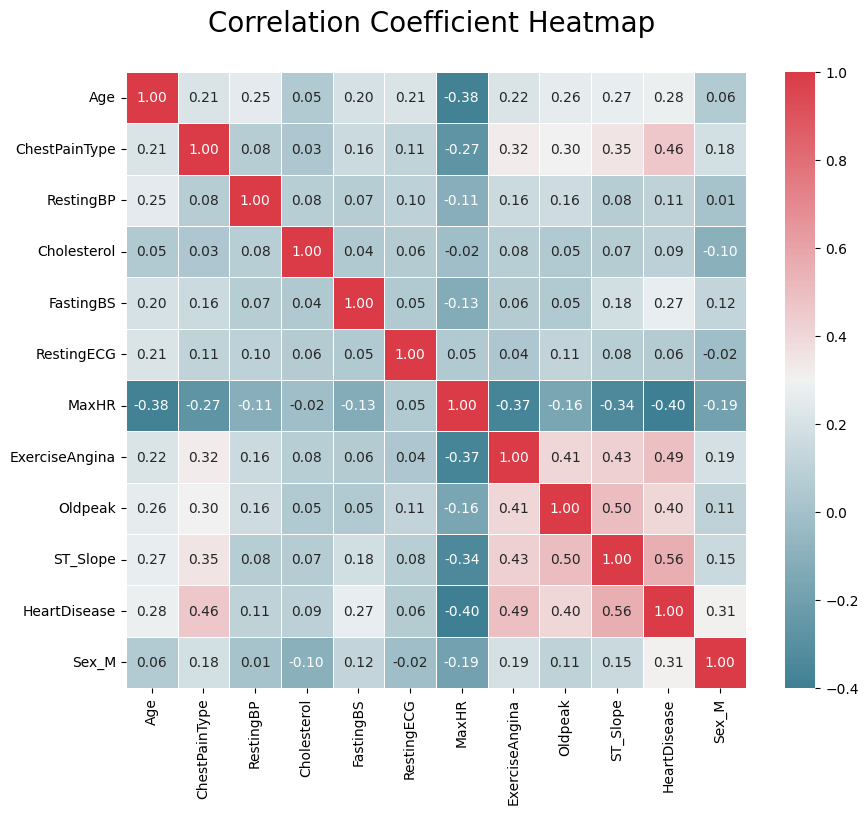

In [13]:
# Correlation Graph Plot:
fix, ax = plt.subplots(figsize = (10,8))
plt.title("Correlation Coefficient Heatmap \n", fontsize = 20)
print()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generating heat maps:
heatmap = sns.heatmap(corr_matrix, annot = True, annot_kws={"fontsize": 10}, fmt = '.2f',
                      linewidths = 0.5, cmap=cmap)
plt.show()

# Step 5: Prediction

In [14]:
# Separate features and target
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# Train a Logistic Regression model on scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 82.61%
